In [4]:
import numpy as np
import pandas as pd

import pytraj as pt
import mdtraj as md
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import pickle
import os
import sys

from glob import glob

import free_energy_clustering as FEC

In [21]:
with open('./pickled/2-Without_IPA/Z_dt1.pickle', 'rb') as inf:
    Z = pickle.load(inf)
with open('./pickled/2-Without_IPA/coords_dt1.pickle', 'rb') as inf:
    coords = pickle.load(inf)
with open('./pickled/2-Without_IPA/FE_landscape_dt1.pickle', 'rb') as inf:
    FE_landscape = pickle.load(inf)
with open('./pickled/2-Without_IPA/FE_points_dt1.pickle', 'rb') as inf:
    FE_points = pickle.load(inf)

with open('./pickled/1-With_IPA/Z_dt1.pickle', 'rb') as inf:
    Z_ipa = pickle.load(inf)
with open('./pickled/1-With_IPA/coords_dt1.pickle', 'rb') as inf:
    coords_ipa = pickle.load(inf)
with open('./pickled/1-With_IPA/FE_landscape_dt1.pickle', 'rb') as inf:
    FE_landscape_ipa = pickle.load(inf)
with open('./pickled/1-With_IPA/FE_points_dt1.pickle', 'rb') as inf:
    FE_points_ipa = pickle.load(inf)





In [68]:
np.concatenate((np.arange(0.0, 2.0, 0.25),np.arange(2.0, 4.0, 0.5)))

array([0.  , 0.25, 0.5 , ..., 2.5 , 3.  , 3.5 ])

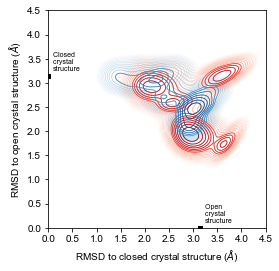

In [86]:
diverging_colors = sns.color_palette("RdBu_r", 50)
sns_cmap = mpl.colors.LinearSegmentedColormap.from_list("", diverging_colors)

# Set custom colormaps
my_cmap1 = mpl.cm.get_cmap('Blues_r')
my_cmap1.set_over('white')

my_cmap2 = mpl.cm.get_cmap("Reds_r")
my_cmap2.set_over('white')


fig, ax = plt.subplots(figsize=(4,4))

ax.contour(coords_ipa[0], coords_ipa[1], FE_landscape_ipa, 
           cmap=my_cmap2, vmin=0,vmax=4.5, 
           levels=np.arange(0.0, 4.75, 0.25),
           extend="neither", alpha=0.5,
           linewidths=0.75)

ax.contour(coords[0], coords[1], FE_landscape, 
           cmap=my_cmap1, vmin=0,vmax=4.5,
           levels=np.arange(0.0, 4.75, 0.25),
           extend="neither", alpha=0.5,
           linewidths=0.75)

ax.contour(coords_ipa[0], coords_ipa[1], FE_landscape_ipa, 
           cmap=my_cmap2, vmin=0,vmax=4.5, 
           levels=np.arange(0.0, 2.0, 0.25),
           extend="neither", alpha=1,
           linewidths=0.75)

ax.contour(coords[0], coords[1], FE_landscape, 
           cmap=my_cmap1, vmin=0,vmax=4.5,
           levels=np.arange(0.0, 2.0, 0.25),
           extend="neither", alpha=1,
           linewidths=0.75)

ax.scatter(x=0.0, y=3.1458, s=20, c="black", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="black", marker="s")


ax.text(0.1, 3.2458, "Closed \ncrystal \nstructure", c="black", fontsize=7)
ax.text(3.2458, 0.1, "Open \ncrystal \nstructure", c="black", fontsize=7)
ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))
ax.set(xlim=(0,4.5) , ylim=(0, 4.5))
ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')
ax.set_aspect('equal')

fig.savefig('./plots/superimposition.png', dpi=600)


In [ ]:
fec.visualize(fontsize=12, savefig=True, xlabel=r'RMSD to closed crystal structure ($\AA$)',
              ylabel=r'RMSD to open crystal structure ($\AA$)', zlabel='z', title=None,
              vmax=4.5, colormap=test_cmap, lim=0.1, n_contour_levels=19, show_data=False, 
              figsize= [5, 5], transition_point_size=1, core_point_size=5, core_point_edgecolor='k', 
              colormap2='spectral',clust_point_edgecolor='w', clust_point_facecolor='', 
              clust_point_size=5, clust_point_linewidth=4, clust_point_marker='s',legend=None,
              extend='max', rmsd_point_size=40, rmsd_point_fontsize=10,rmsd_point_color='k', dx=1,
              filename='./plots/2-Without_IPA/1-FES_without_IPA_dt1', ax=None)

In [ ]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
#ax.plot(rmsd_closed, rmsd_open, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa, rmsd_open_ipa, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

#ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

#ax.set_xticks(np.arange(0, 5, 0.5))
#ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()